In [1]:
# ignore warnings
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
import wrangle
from acquire import get_zillow_data
# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#Modeling Imports
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans, dbscan
from sklearn.preprocessing import MinMaxScaler

pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', 80)

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df = df.drop(columns=['parcelid', 'bathrooms', 'bedrooms', 'buildingquality', 'county','square_feet', 'lot_size', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unit_count', 'assessmentyear', 'transactiondate', 'heating_system',
       'age_bin', 'taxrate',  'acres_bin', 'sqft_bin', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin', 'bath_bed_ratio','tax_value_bin', 'land_tax_value_bin'])

In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.data_split(df)

In [5]:
# scale the data

# Make the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(X_train)

# Use the scaler
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

## <font color = 'red'> Cluster on All Columns

In [6]:
X = X_train_scaled

# Make the kmeans object
kmeans = KMeans(n_clusters=4)

# fit the kmeans model
kmeans.fit(X)

# use the thing
kmeans.predict(X)

array([3, 0, 0, ..., 0, 1, 3], dtype=int32)

In [7]:
X["cluster_all"] = kmeans.predict(X)

In [8]:
X.head()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
0,0.30,0.34,0.88,0.25,0.05,0.10,0.08,0.08,0.00,0.06,0.07,0.00,3
1,0.00,0.52,0.84,0.44,0.06,0.08,0.05,0.07,0.01,0.11,0.02,0.00,0
2,0.00,0.54,0.42,0.09,0.38,0.49,0.32,0.42,0.02,0.19,0.07,0.00,0
3,0.00,0.44,0.82,0.25,0.13,0.09,0.02,0.08,0.01,0.09,0.00,0.00,0
4,0.00,0.27,0.60,0.36,0.09,0.22,0.20,0.17,0.01,0.08,0.06,0.00,0


In [9]:
X.cluster_all.value_counts()

0    12003
3     7677
1     6356
2     2422
Name: cluster_all, dtype: int64

In [10]:
cluster0 = X[X.cluster_all == 0]
cluster1 = X[X.cluster_all == 1]
cluster2 = X[X.cluster_all == 2]
cluster3 = X[X.cluster_all == 3]

In [11]:
cluster0.describe()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
count,"12,003.00","12,003.00","12,003.00","12,003.00","12,003.00","12,003.00","12,003.00","12,003.00","12,003.00","12,003.00","12,003.00","12,003.00","12,003.00"
mean,0.00,0.53,0.70,0.40,0.05,0.08,0.06,0.07,0.02,0.06,0.02,0.00,0.00
std,0.00,0.19,0.10,0.16,0.05,0.08,0.07,0.06,0.03,0.04,0.03,0.00,0.00
min,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.39,0.64,0.29,0.02,0.03,0.01,0.03,0.01,0.04,0.00,0.00,0.00
50%,0.00,0.48,0.70,0.44,0.04,0.06,0.04,0.05,0.01,0.06,0.01,0.00,0.00
75%,0.00,0.58,0.76,0.49,0.06,0.09,0.07,0.08,0.01,0.08,0.03,0.00,0.00
max,0.30,1.00,0.95,1.00,0.82,0.98,0.84,0.77,1.00,0.91,0.91,0.00,0.00


In [12]:
cluster1.describe()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
count,"6,356.00","6,356.00","6,356.00","6,356.00","6,356.00","6,356.00","6,356.00","6,356.00","6,356.00","6,356.00","6,356.00","6,356.00","6,356.00"
mean,0.00,0.53,0.56,0.48,0.07,0.11,0.09,0.10,0.01,0.07,0.03,1.00,1.00
std,0.00,0.08,0.06,0.15,0.08,0.12,0.10,0.10,0.03,0.06,0.04,0.00,0.00
min,0.00,0.25,0.43,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
25%,0.00,0.48,0.51,0.41,0.02,0.04,0.02,0.03,0.01,0.04,0.01,1.00,1.00
50%,0.00,0.54,0.55,0.47,0.04,0.08,0.06,0.07,0.01,0.06,0.02,1.00,1.00
75%,0.00,0.59,0.61,0.57,0.08,0.14,0.11,0.12,0.01,0.09,0.04,1.00,1.00
max,0.00,0.67,0.69,0.95,1.00,1.00,1.00,1.00,0.83,0.85,0.77,1.00,1.00


In [13]:
cluster2.describe()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
count,"2,422.00","2,422.00","2,422.00","2,422.00","2,422.00","2,422.00","2,422.00","2,422.00","2,422.00","2,422.00","2,422.00","2,422.00","2,422.00"
mean,1.00,0.62,0.26,0.29,0.08,0.10,0.07,0.08,0.02,0.08,0.02,0.00,2.00
std,0.00,0.05,0.10,0.14,0.05,0.08,0.06,0.06,0.03,0.03,0.02,0.00,0.00
min,1.00,0.48,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,2.00
25%,1.00,0.58,0.16,0.20,0.05,0.06,0.03,0.04,0.01,0.07,0.01,0.00,2.00
50%,1.00,0.61,0.28,0.29,0.07,0.09,0.05,0.07,0.01,0.08,0.02,0.00,2.00
75%,1.00,0.64,0.34,0.38,0.10,0.13,0.09,0.10,0.01,0.10,0.03,0.00,2.00
max,1.00,0.77,0.43,0.99,0.52,0.74,0.63,0.55,0.68,0.21,0.51,0.00,2.00


In [14]:
cluster3.describe()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
count,"7,677.00","7,677.00","7,677.00","7,677.00","7,677.00","7,677.00","7,677.00","7,677.00","7,677.00","7,677.00","7,677.00","7,677.00","7,677.00"
mean,0.30,0.26,0.86,0.30,0.07,0.12,0.09,0.09,0.01,0.07,0.04,0.00,3.00
std,0.02,0.09,0.07,0.13,0.08,0.11,0.09,0.08,0.01,0.04,0.06,0.00,0.00
min,0.00,0.04,0.52,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
25%,0.30,0.19,0.80,0.20,0.03,0.05,0.03,0.04,0.01,0.04,0.01,0.00,3.00
50%,0.30,0.26,0.85,0.32,0.05,0.09,0.08,0.07,0.01,0.06,0.03,0.00,3.00
75%,0.30,0.33,0.92,0.39,0.09,0.15,0.12,0.11,0.01,0.08,0.06,0.00,3.00
max,0.30,0.52,1.00,0.83,0.80,0.96,0.93,0.73,0.25,1.00,1.00,0.00,3.00


<AxesSubplot:xlabel='latitude', ylabel='logerror'>

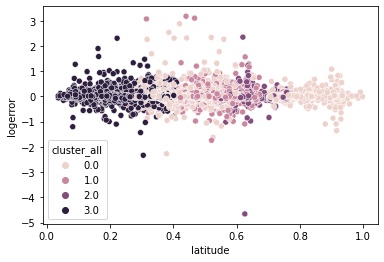

In [15]:
sns.scatterplot(x=X.latitude, y=y_train.logerror, hue=(X.cluster_all))

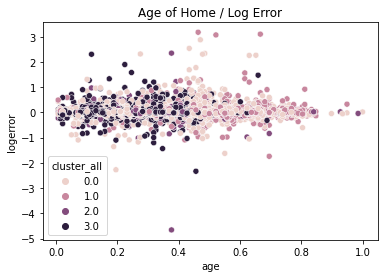

In [16]:
sns.scatterplot(x=X.age, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('Age of Home / Log Error')
plt.show()

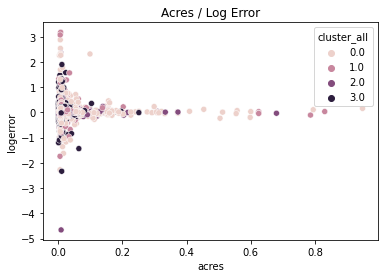

In [17]:
sns.scatterplot(x=X.acres, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('Acres / Log Error')
plt.show()

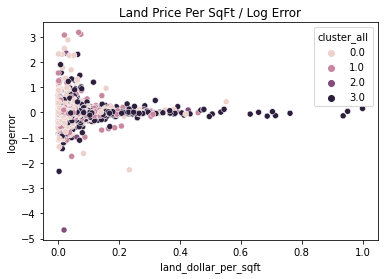

In [18]:
sns.scatterplot(x=X.land_dollar_per_sqft, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('Land Price Per SqFt / Log Error')
plt.show()

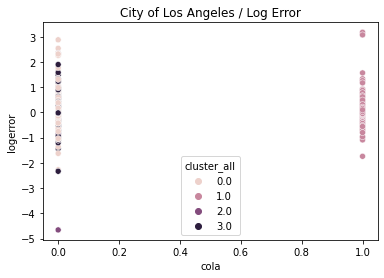

In [19]:
sns.scatterplot(x=X.cola, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('City of Los Angeles / Log Error')
plt.show()

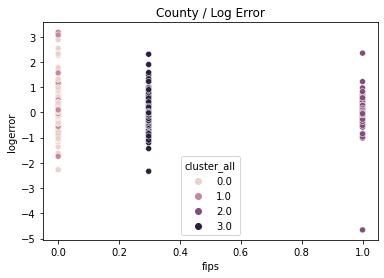

In [20]:
sns.scatterplot(x=X.fips, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('County / Log Error')
plt.show()

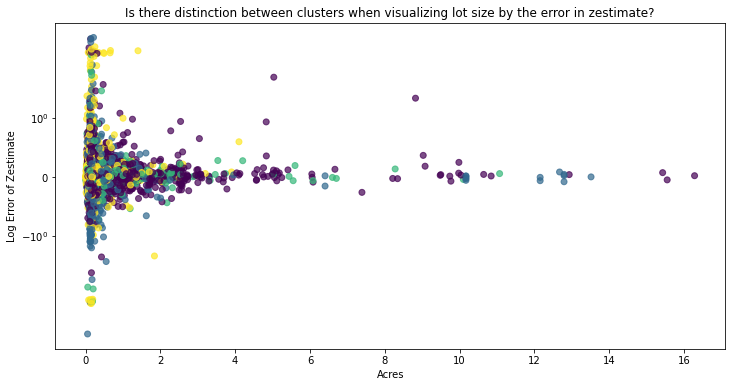

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train.logerror, x=X_train.acres, c=X.cluster_all, alpha=.7)
plt.yscale('symlog')
plt.xlabel('Acres')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing lot size by the error in zestimate?')
plt.show()

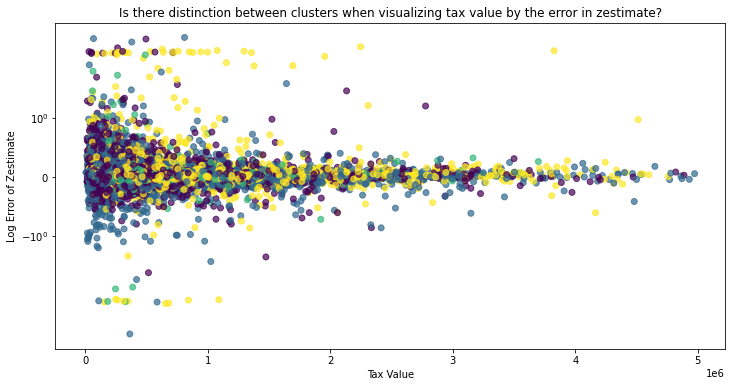

In [22]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train.logerror, x=X_train.tax_value, c=X.cluster_all, alpha=.7)
plt.yscale('symlog')
plt.xlabel('Tax Value')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing tax value by the error in zestimate?')
plt.show()

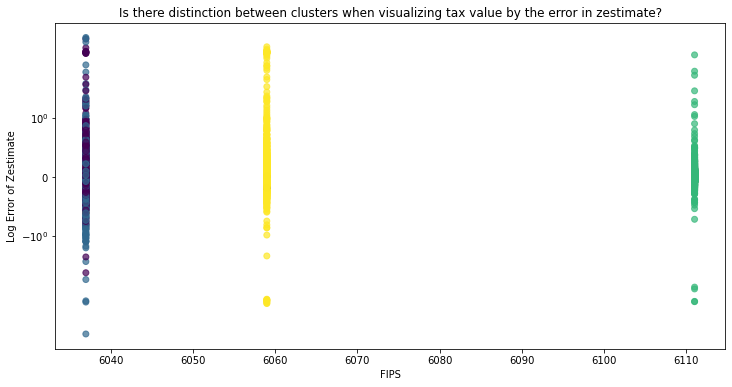

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train.logerror, x=X_train.fips, c=X.cluster_all, alpha=.7)
plt.yscale('symlog')
plt.xlabel('FIPS')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing tax value by the error in zestimate?')
plt.show()

## <font color = 'red'> Cluster on Land Columns (size, cost, location)